In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
import numpy as np

pd.options.display.max_rows = 100


In [235]:
path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
#     print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    df['params'] = "{"+filename.split("_{")[-1][:-4]
    li.append(df)

total_frame = pd.concat(li, axis=0, ignore_index=True)

total_frame.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,params
0,0,324652.86,223474.41,23300.555309,29579.745224,3154.551065,165604.866874,8078.16,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.231083e+10,88.229712,1187.089907,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
1,1,229534.20,198485.92,23464.752699,29595.668288,3122.286319,165604.866874,1884.71,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,6.945128e+09,55.085872,923.771508,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
2,2,353942.46,195018.61,21601.843042,29224.130128,1658.945670,165604.866874,12183.20,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.603366e+10,91.280861,1191.384811,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
3,3,363324.00,208966.06,23278.203832,29656.706700,3188.160175,165604.866874,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.352380e+10,110.944281,1245.402612,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
4,4,136551.84,146665.87,22191.845222,29595.668288,3116.600720,148459.399850,0.00,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,2.049940e+10,42.642955,604.470164,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."


In [236]:
total_frame.groupby('params').Carbon_emitted.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       1009.256046
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}     970.917739
{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}         973.583506
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}      941.022025
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}         1003.615459
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}      1015.633864
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}           980.373592
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}        991.059337
Name: Carbon_emitted, dtype: float64

In [237]:
total_frame.groupby('params').Electricity_cost.mean()

params
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       43.283102
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    42.593877
{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        42.133633
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     41.918422
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}         42.148383
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}      42.293900
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          43.024119
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}       42.740109
Name: Electricity_cost, dtype: float64

In [238]:
results_dict = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-18-21-53-51.7447140100.csv', "rb" ) )
results_dict = pd.DataFrame.from_dict((results_dict))

In [239]:
def get_metric(results_dict, metric):
    hold_dat = {}
    for res in results_dict:
        hold_frame = []
        for i in range(len(results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'])):
             hold_frame.append(results_dict[res][i][metric])
        hold_dat[res] = hold_frame

    results_df = pd.DataFrame(hold_dat)
    return results_df

In [240]:
results_metrics = get_metric(results_dict, "median_absolute_error")
results_metrics

,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 10, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 100, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": 1000, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 10, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 100, ""shuffle"": false, ""tol"": 0.001}","{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1000, ""shuffle"": false, ""tol"": 0.001}","{""C"": 1, ""fit_intercept"": true, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}","{""C"": 1, ""fit_intercept"": true, ""max_iter"": 10, ""shuffle"": false, ""tol"": 0.001}",...,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 10, ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50], ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50], ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 50, ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 50, ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50, 100], ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": [10, 50, 100], ""learning_rate"": ""adaptive"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 20, ""learning_rate"": ""constant"", ""solver"": ""adam""}","{""hidden_layer_sizes"": 20, ""learning_rate"": ""adaptive"", ""solver"": ""adam""}"
0,7423.690230,7423.690230,7423.690230,7423.690230,9264.162499,9264.162499,9264.162499,9264.162499,1459.321975,1459.321975,...,2006.292729,1976.674268,1980.800106,1976.822075,1984.761957,1974.737577,1989.300813,1951.659725,1985.585791,1999.413047
1,7379.767508,7379.767508,7379.767508,7379.767508,9261.717266,9261.717266,9261.717266,9261.717266,1479.765935,1479.765935,...,2001.766878,1995.576590,1997.829934,1975.656562,1980.932653,1962.924122,1958.631736,1984.011404,2010.216000,1998.684149
2,7366.851765,7366.851765,7366.851765,7366.851765,9294.522632,9294.522632,9294.522632,9294.522632,1491.700914,1491.700914,...,1992.331466,2015.136713,2004.319157,2017.389529,2000.092135,1976.940737,2010.493451,1983.256595,1997.628037,1999.510035
3,7343.025700,7343.025700,7343.025700,7343.025700,9279.762781,9279.762781,9279.762781,9279.762781,1546.046992,1546.046992,...,2044.003627,2053.747378,2054.115592,2040.578562,2037.738844,1994.062500,2050.833943,1995.300393,2029.211532,2013.635247
4,7398.655240,7398.655240,7398.655240,7398.655240,9295.768247,9295.768247,9295.768247,9295.768247,1588.928349,1588.928349,...,2034.227655,2037.934407,2073.974296,2073.990554,2056.780241,2064.305121,2062.323679,2032.539973,2062.069180,2061.339028
5,7359.671845,7359.671845,7359.671845,7359.671845,9235.631954,9235.631954,9235.631954,9235.631954,1624.868197,1624.868197,...,2088.508201,2098.611426,2058.641208,2079.424570,2067.324506,2061.649869,2086.489872,2087.786463,2077.975816,2077.240627
6,7365.675365,7365.675365,7365.675365,7365.675365,9280.653869,9280.653869,9280.653869,9280.653869,1649.166251,1649.166251,...,2103.053297,2106.001357,2117.601212,2104.359861,2103.422998,2094.653450,2082.430817,2072.132841,2108.477171,2092.218021
7,7379.748319,7379.748319,7379.748319,7379.748319,9220.706169,9220.706169,9220.706169,9220.706169,1665.335542,1665.335542,...,2109.652343,2105.785235,2121.446378,2102.131945,2137.339311,2104.892687,2112.146849,2116.324355,2118.743033,2146.015331
8,7423.467462,7423.467462,7423.467462,7423.467462,9233.610725,9233.610725,9233.610725,9233.610725,1687.437216,1687.437216,...,2125.360435,2163.588844,2145.191169,2135.314276,2135.474045,2156

In [241]:
results_metrics.mean()

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}        7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}       7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 100, "shuffle": false, "tol": 0.001}      7648.049795
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}     7648.049795
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}       9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 10, "shuffle": false, "tol": 0.001}      9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 100, "shuffle": false, "tol": 0.001}     9503.368829
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}    9503.368829
{"C": 1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}          1553.981700
{"C": 1, "fit_intercept": true, "max_iter": 10, "shuffle": false, "tol": 0.001}         1553.981700


In [242]:
joined_df = total_frame.set_index('params').join(results_metrics.mean().to_frame())
joined_df.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,0
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",0,306932.70,239410.29,23300.555309,29579.745224,3154.551065,165604.866874,10447.87,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.253054e+10,87.457669,1191.440575,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",1,214244.28,216939.53,23464.752699,29595.668288,3122.286319,165604.866874,1884.71,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,6.818218e+09,55.160993,926.705801,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",2,343491.60,204808.29,21601.843042,29224.130128,1658.945670,165604.866874,13135.74,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.604295e+10,90.772797,1193.947894,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",3,345568.80,228578.60,23278.203832,29656.706700,3188.160175,165604.866874,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.348648e+10,109.372461,1252.198769,9503.368829
"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"": 1, ""shuffle"": false, ""tol"": 0.001}",4,142010.94,142412.51,22191.845222,29595.668288,3116.600720,148459.399850,0.00,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.989626e+10,43.245894,606.061198,9503.368829


correlations = joined_df.groupby(joined_df.index).Carbon_emitted.mean()

correlations = pd.concat([joined_df.groupby(joined_df.index).Carbon_emitted.mean(), results_metrics.mean()], axis=1).reset_index()
correlations = correlations.dropna()
correlations = correlations.rename({0: "absolute_median_error"}, axis=1)

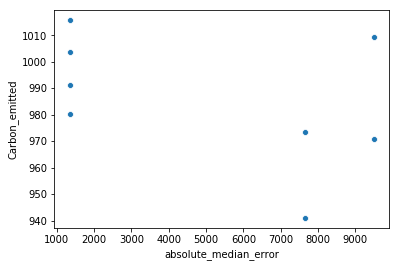

In [243]:
sns.scatterplot(data = correlations, y="Carbon_emitted", x="absolute_median_error")

# Visualise results

In [244]:
results_dict['{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'].iloc[0]

{'median_absolute_error': 7423.690230130251,
 'mean_squared_error': 280592024.0511837,
 'mean_absolute_error': 12346.327822366233,
 'root_mean_squared_error': 16750.88129177637}

In [342]:
def get_results_mean(error_metric, output_metric):
#     total_frame.groupby('params')[error_metric].mean()

    correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
    results_metrics = get_metric(results_dict, error_metric)
    results_metrics
    
    correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric].mean(), results_metrics.mean()], axis=1).reset_index()
    correlations = correlations.dropna()
    correlations = correlations.rename({0: error_metric}, axis=1)
    
    sns.regplot(data = correlations, x= error_metric, y=output_metric)
    plt.show()
    plt.close()
    
    return correlations

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


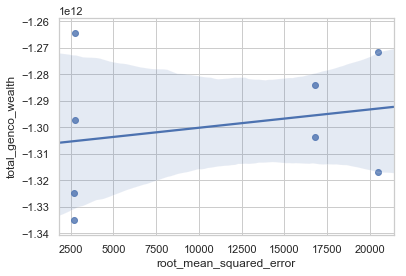

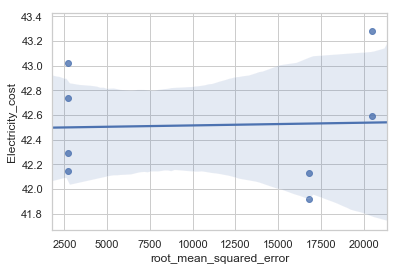

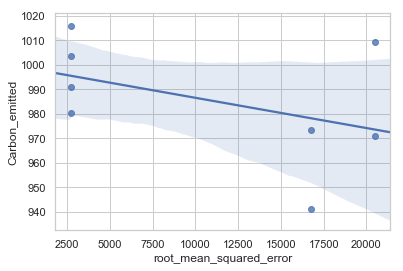

In [343]:
for output_metric in ['total_genco_wealth', 'Electricity_cost', 'Carbon_emitted']:
    get_results_mean('root_mean_squared_error', output_metric)

/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


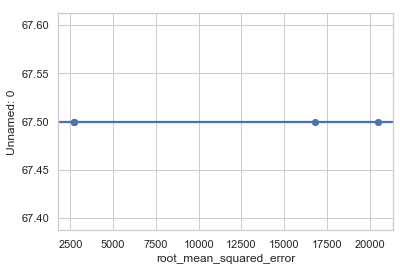

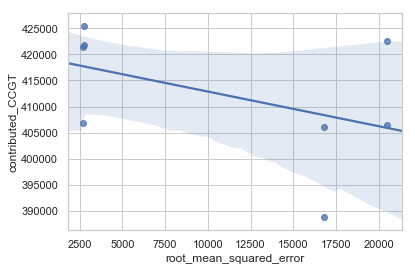

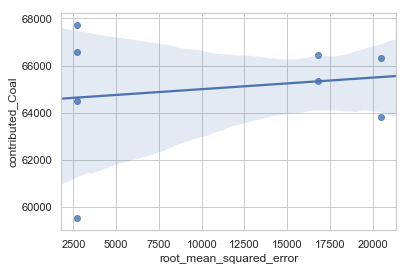

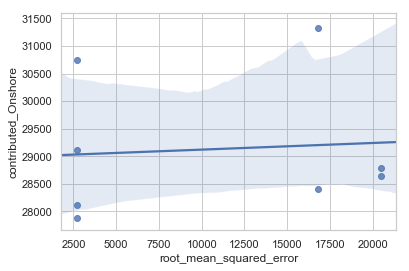

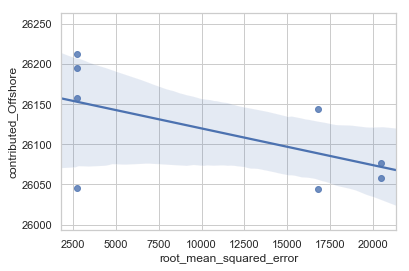

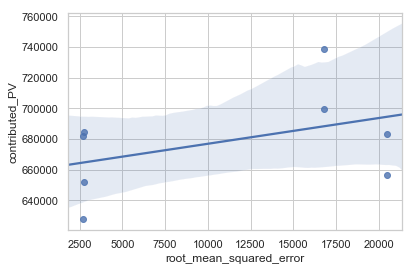

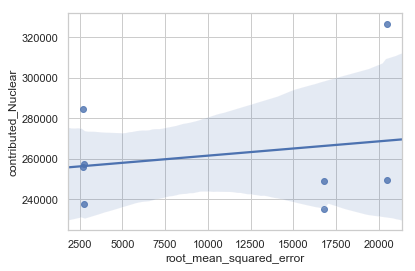

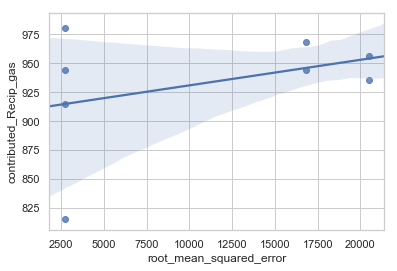

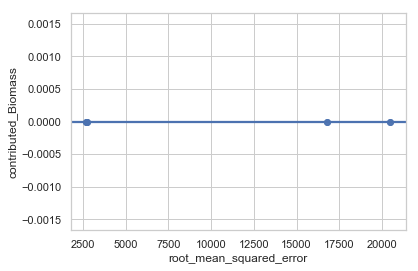

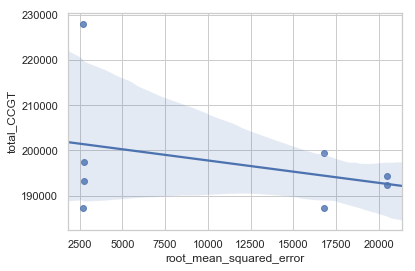

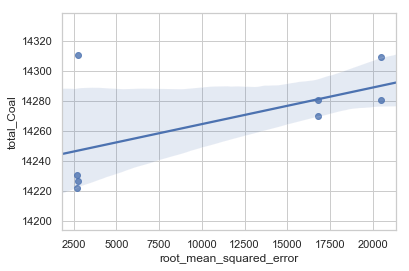

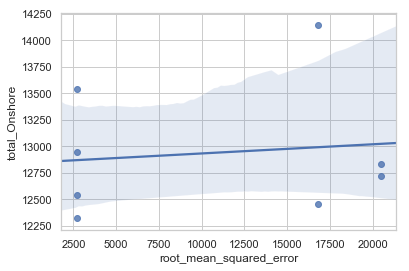

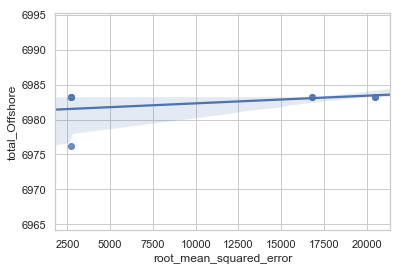

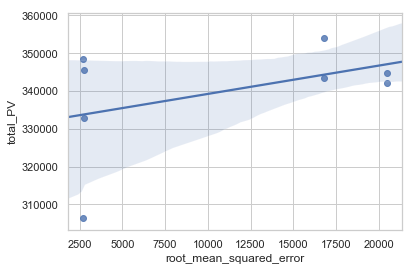

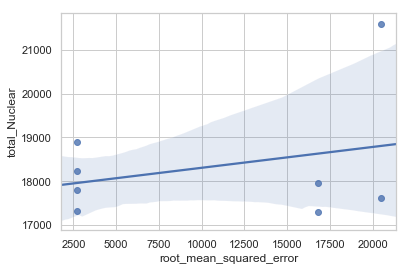

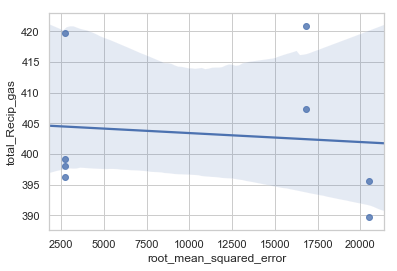

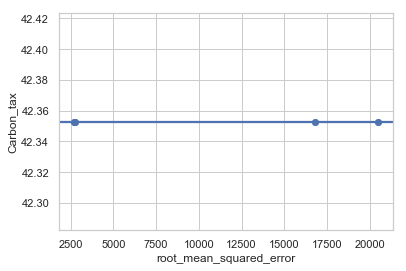

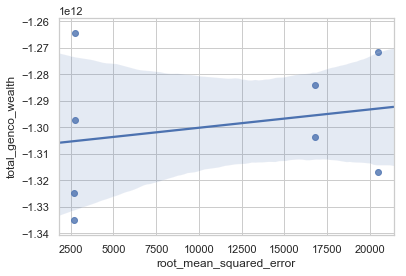

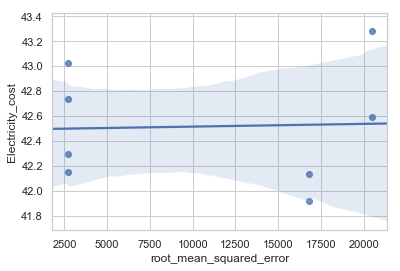

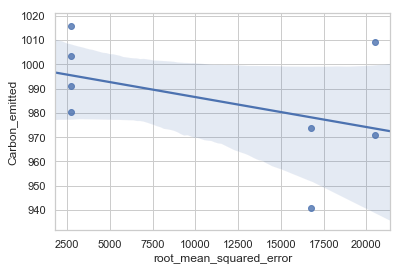

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 8 and the array at index 1 has size 1

In [344]:
for output_metric in joined_df.columns:
    get_results_mean('root_mean_squared_error', output_metric)

In [247]:
# def get_results_over_time(error_metric, output_metric):

#     correlations = joined_df.groupby(joined_df.index)[output_metric].mean()
#     results_metrics = get_metric(results_dict, error_metric)
#     results_metrics
    
#     correlations = pd.concat([joined_df.groupby(joined_df.index)[output_metric], results_metrics.mean()], axis=1).reset_index()
#     correlations = correlations.dropna()
#     correlations = correlations.rename({0: error_metric}, axis=1)
    
#     sns.scatterplot(data = correlations, x= error_metric, y=output_metric)
#     plt.show()
#     plt.close()
    
#     return correlations


# joined_df.columns.str.contains("contributed_")
joined_df.reset_index()

,index,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,0
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,306932.70,239410.29,23300.555309,29579.745224,3.154551e+03,165604.866874,10447.87,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.253054e+10,87.457669,1191.440575,9503.368829
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",1,214244.28,216939.53,23464.752699,29595.668288,3.122286e+03,165604.866874,1884.71,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,6.818218e+09,55.160993,926.705801,9503.368829
2,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",2,343491.60,204808.29,21601.843042,29224.130128,1.658946e+03,165604.866874,13135.74,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.604295e+10,90.772797,1193.947894,9503.368829
3,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",3,345568.80,228578.60,23278.203832,29656.706700,3.188160e+03,165604.866874,13192.97,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,3.348648e+10,109.372461,1252.198769,9503.368829
4,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",4,142010.94,142412.51,22191.845222,29595.668288,3.116601e+03,148459.399850,0.00,0,...,8862.6,6983.8,3377.8,9361.0,971.5,30.8,1.989626e+10,43.245894,606.061198,9503.368829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80507,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",131,153206.13,0.00,41540.230639,24101.397381,2.043556e+06,454940.888444,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.051870e+12,29.185714,311.008444,1340.091961
80508,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",132,0.00,0.00,36892.619441,21077.092863,7.880563e+05,377402.983188,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.157457e+12,7.301453,0.000000,1340.091961
80509,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",133,127812.30,0.00,38836.848554,21918.526493,2.454386e+06,455712.655597,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.236368e+12,28.224883,259.458969,1340.091961
80510,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",134,0.00,0.00,37881.063167,21429.626605,1.241776e+06,323550.294889,0.00,0,...,17876.2,6979.5,816177.8,42361.0,0.0,87.9,-5.397107e+12,6.649806,0.000000,1340.091961


{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


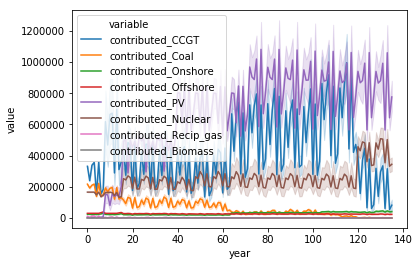

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


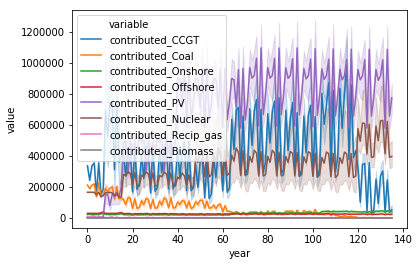

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


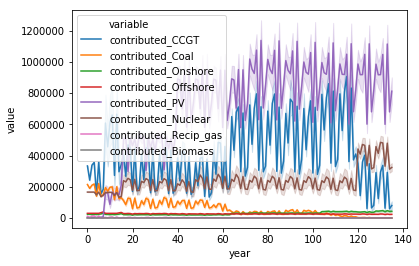

{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


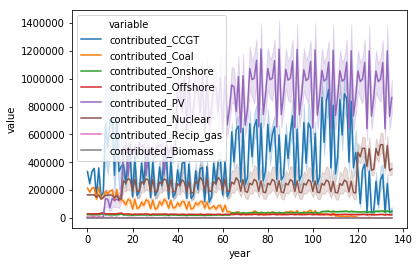

{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


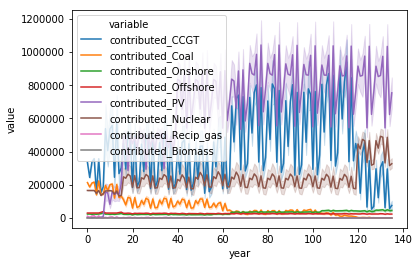

{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


KeyboardInterrupt: 

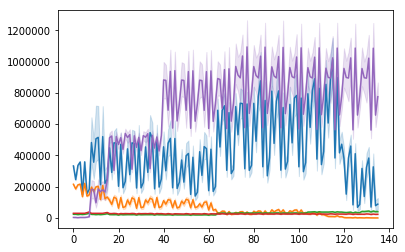

In [248]:
joined_df_long = joined_df.reset_index().filter(regex="contributed_|Unnamed|index").melt(id_vars=['Unnamed: 0', 'index'])
joined_df_long = joined_df_long.rename({"Unnamed: 0":"year"}, axis=1)
joined_df_long
# g = sns.FacetGrid(data = joined_df_long, col='index')
# g.map(sns.lineplot, x="year", hue='variable', y='value')
# joined_df_long
for name, df in joined_df_long.groupby('index'):
    print(name)
    sns.lineplot(data=pd.DataFrame(df), x='year', hue='variable', y='value')
    plt.show()
    plt.close()

In [270]:



total_frame
total_frame['year'] = total_frame['Unnamed: 0']/8
total_frame['year'] = total_frame['year'].apply(np.floor)
total_frame['year']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
80507    16.0
80508    16.0
80509    16.0
80510    16.0
80511    16.0
Name: year, Length: 80512, dtype: float64

In [315]:
def plot_multiple_electricity_mixes():
    path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/market_comparison_results' # use your path
    all_files = glob.glob(path + "/*.csv")
    results = []
    

    for i, filename in enumerate(all_files):
        result = pd.read_csv(filename, index_col=None, header=0)
        result['params'] = "{"+filename.split("_{")[-1][:-4]
        if i == 1:
            sns.lineplot(data=result[::8], x='Unnamed: 0', y='Carbon_tax')
            plt.ylim([0,500])
            plt.show()
        per_year_dat = get_projection_difference_sum(result)
        results.append(per_year_dat)
    
    results_concat = pd.concat(results)
    for name, one_df in results_concat.groupby('params'):


        one_df = one_df.replace({'variable' : { 'beis_projections' : 'BEIS', 'simulated_perc' : 'ElecSim'}})
        one_df = one_df.replace({'fuel_type' : { 'Natural_gas' : 'Gas', 'coal' : 'Coal', 'nuclear':'Nuclear', "onshore":"Onshore", "offshore":"Offshore","solar":"Solar","biomass":"Biomass","ccgt":"CCGT","recip_gas":"Reciprocating\nGas"}})
        one_df = one_df.rename(columns={'fuel_type':"Fuel Type"})
        # one_df.head()
        sns.set(font_scale=1)
        sns.set_style("whitegrid")

    #     sns.lineplot(data=one_df, x='year',y='')
        print(one_df['params'].iloc[0])
        g=sns.lineplot(data=one_df, x='year', hue='Fuel Type',  y='simulated_perc')
        g.set(xlabel='Year', ylabel='Electricity Mix (%)')
        # lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)
        plt.ylim(0,0.65)

        plt.show()
        plt.close()
    
    return results_concat
#     plt.savefig("/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/figures/results/best_electricity_mixes/{}_mix.pdf".format(folder), dpi=1000, bbox_inches='tight')



def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run'
    params = results_df['params'].iloc[0]
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    joined['params'] = params
    return joined

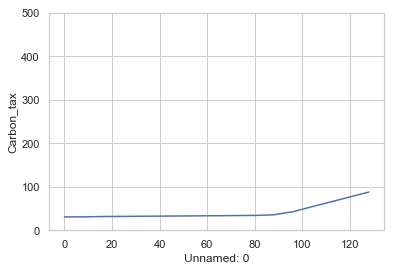

{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


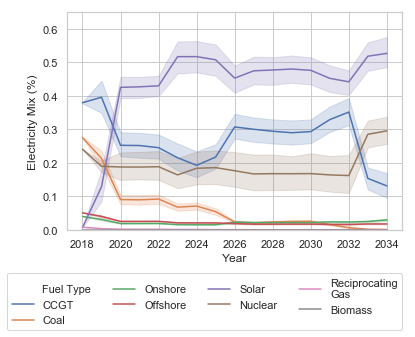

{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


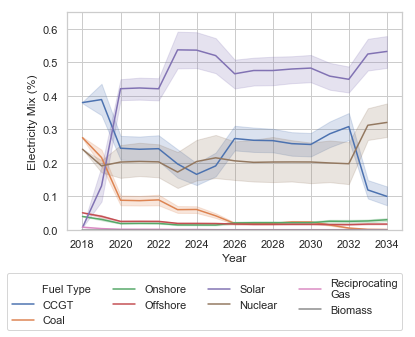

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


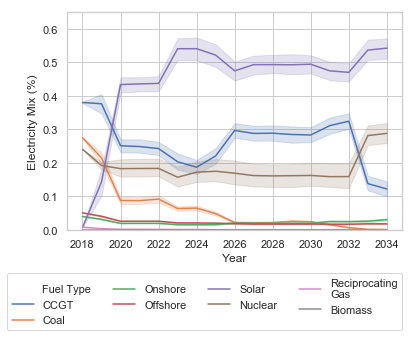

{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


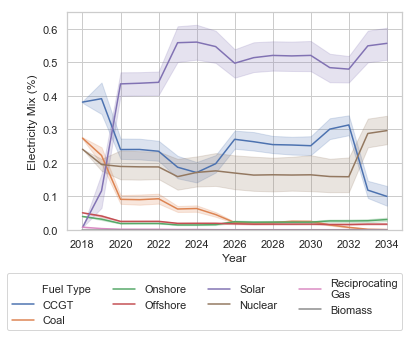

{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


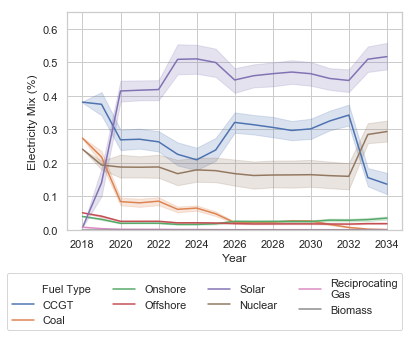

{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


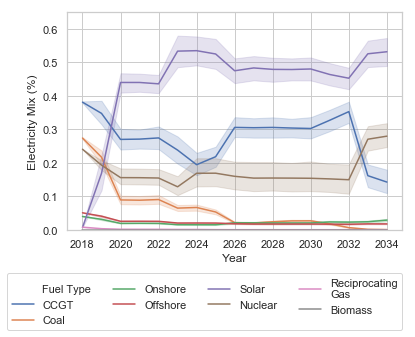

{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


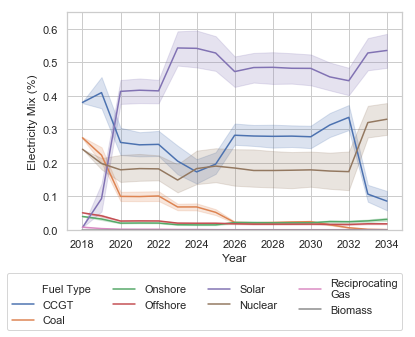

{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


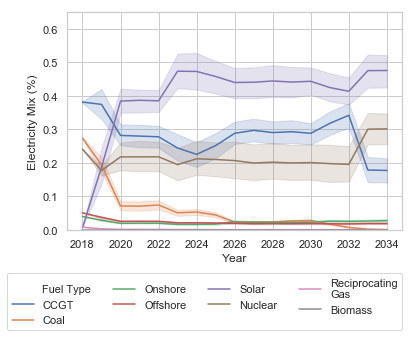

In [316]:
# averaged_df = total_frame.reset_index().groupby('params').apply(get_average_per_year_cleaned)
# averaged_df
results_concat = plot_multiple_electricity_mixes()

In [317]:
results_concat

,year,fuel_type,actual,simulated_perc,params
0,2018,ccgt,9622.359685,0.361354,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
1,2019,ccgt,101375.258002,0.846437,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
2,2020,ccgt,58815.570653,0.706887,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
3,2021,ccgt,56646.688623,0.695796,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
4,2022,ccgt,55412.000743,0.690651,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
...,...,...,...,...,...
131,2030,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1..."
132,2031,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1..."
133,2032,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1..."
134,2033,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1..."


In [328]:
'{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}'
'{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}'

both_results = results_concat[results_concat.params.str.contains('{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}')].append(results_concat[results_concat.params.str.contains('{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}')])
both_results

,year,fuel_type,actual,simulated_perc,params
0,2018,ccgt,10056.652062,0.378406,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
1,2019,ccgt,10366.864240,0.233778,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
2,2020,ccgt,15088.860371,0.342390,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
3,2021,ccgt,14769.331788,0.347090,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
4,2022,ccgt,21939.941469,0.441467,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
...,...,...,...,...,...
131,2030,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,..."
132,2031,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,..."
133,2032,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,..."
134,2033,biomass,0.000000,0.000000,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,..."


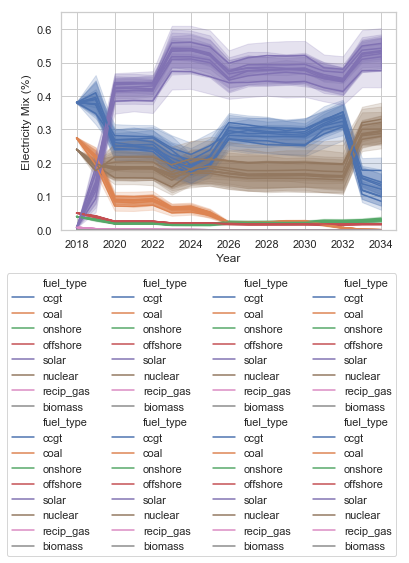

In [340]:
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for name, one_df in results_concat.groupby('params'):

    g=sns.lineplot(data=one_df, x='year', hue='fuel_type',  y='simulated_perc')
    g.set(xlabel='Year', ylabel='Electricity Mix (%)')
    # lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)
    plt.ylim(0,0.65)

plt.show()
#     plt.close()